<a href="https://colab.research.google.com/github/Zulema-Rodriguez/Challenge-TelecomX-ALURA/blob/main/Challenge_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import requests

In [100]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

In [101]:
df = pd.DataFrame(data)

In [102]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [103]:
df = df.rename(columns={
    'customerID': 'ID_cliente',
    'churn': 'cancelación',
    'customer': 'cliente',
    'phone': 'teléfono',
    'internet': 'internet',
    'account': 'cuenta'
})

In [104]:
df.head()

,ID_cliente,Churn,cliente,teléfono,internet,cuenta
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [105]:

cliente_df = pd.json_normalize(df['cliente'])
teléfono_df = pd.json_normalize(df['teléfono'])
internet_df = pd.json_normalize(df['internet'])
cuenta_df = pd.json_normalize(df['cuenta'])


df = pd.concat([df.drop(['cliente', 'teléfono', 'internet', 'cuenta'], axis=1),
                cliente_df, teléfono_df, internet_df, cuenta_df], axis=1)

In [106]:
df.head()

,ID_cliente,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [107]:
df.columns

Index(['ID_cliente', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [108]:
df = df.rename(columns={
    'gender': 'género',
    'SeniorCitizen': 'adulto_mayor',
    'Partner': 'pareja',
    'Dependents': 'dependientes',
    'tenure': 'antigüedad_meses',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_online',
    'OnlineBackup': 'respaldo_online',
    'DeviceProtection': 'protección_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'peliculas_streaming',
    'Contract': 'contrato',
    'PaperlessBilling': 'factura_electronica',
    'PaymentMethod': 'método_pago',
    'MonthlyCharges': 'cargo_mensual',
    'TotalCharges': 'cargo_total'
})

In [109]:
df.head()

,ID_cliente,Churn,género,adulto_mayor,pareja,dependientes,antigüedad_meses,servicio_telefonico,lineas_multiples,servicio_internet,...,respaldo_online,protección_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,contrato,factura_electronica,método_pago,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [110]:
traducciones = {
    "Male": "Hombre",
    "Female": "Mujer",
    "Yes": "Sí",
    "No": "No",
    "No phone service": "Sin servicio telefónico",
    "No internet service": "Sin servicio de internet",

    "DSL": "DSL",
    "Fiber optic": "Fibra óptica",
    "Month-to-month": "Mes a mes",
    "One year": "Un año",
    "Two year": "Dos años",

    "Electronic check": "Cheque electrónico",
    "Mailed check": "Cheque por correo",
    "Bank transfer (automatic)": "Transferencia bancaria (automática)",
    "Credit card (automatic)": "Tarjeta de crédito (automática)",

    "Partner": "Pareja",
    "Dependents": "Personas a cargo",

    "PaperlessBilling": "Factura electrónica",

    "StreamingTV": "TV por streaming",
    "StreamingMovies": "Películas por streaming",
    "OnlineSecurity": "Seguridad en línea",
    "OnlineBackup": "Respaldo en línea",
    "DeviceProtection": "Protección de dispositivo",
    "TechSupport": "Soporte técnico",

    "Churn": "Cancelación"
}

In [111]:
df = df.replace(traducciones)

In [112]:
df.head()

,ID_cliente,Churn,género,adulto_mayor,pareja,dependientes,antigüedad_meses,servicio_telefonico,lineas_multiples,servicio_internet,...,respaldo_online,protección_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,contrato,factura_electronica,método_pago,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Mujer,0,Sí,Sí,9,Sí,No,DSL,...,Sí,No,Sí,Sí,No,Un año,Sí,Cheque por correo,65.6,593.3
1,0003-MKNFE,No,Hombre,0,No,No,9,Sí,Sí,DSL,...,No,No,No,No,Sí,Mes a mes,No,Cheque por correo,59.9,542.4
2,0004-TLHLJ,Sí,Hombre,0,No,No,4,Sí,No,Fibra óptica,...,No,Sí,No,No,No,Mes a mes,Sí,Cheque electrónico,73.9,280.85
3,0011-IGKFF,Sí,Hombre,1,Sí,No,13,Sí,No,Fibra óptica,...,Sí,Sí,No,Sí,Sí,Mes a mes,Sí,Cheque electrónico,98.0,1237.85
4,0013-EXCHZ,Sí,Mujer,1,Sí,No,3,Sí,No,Fibra óptica,...,No,No,Sí,Sí,No,Mes a mes,Sí,Cheque por correo,83.9,267.4


In [113]:
df.dtypes

,0
ID_cliente,object
Churn,object
género,object
adulto_mayor,int64
pareja,object
dependientes,object
antigüedad_meses,int64
servicio_telefonico,object
lineas_multiples,object
servicio_internet,object


In [114]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

In [115]:
df['Charges.Total'].isna().sum()

np.int64(11)

In [116]:
df.dtypes

,0
ID_cliente,object
Churn,object
género,object
adulto_mayor,int64
pareja,object
dependientes,object
antigüedad_meses,int64
servicio_telefonico,object
lineas_multiples,object
servicio_internet,object


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_cliente              7267 non-null   object 
 1   Churn                   7267 non-null   object 
 2   género                  7267 non-null   object 
 3   adulto_mayor            7267 non-null   int64  
 4   pareja                  7267 non-null   object 
 5   dependientes            7267 non-null   object 
 6   antigüedad_meses        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   object 
 8   lineas_multiples        7267 non-null   object 
 9   servicio_internet       7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  protección_dispositivo  7267 non-null   object 
 13  soporte_tecnico         7267 non-null   object 
 14  tv_streaming            7267 non-null   

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_cliente              7267 non-null   object 
 1   Churn                   7267 non-null   object 
 2   género                  7267 non-null   object 
 3   adulto_mayor            7267 non-null   int64  
 4   pareja                  7267 non-null   object 
 5   dependientes            7267 non-null   object 
 6   antigüedad_meses        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   object 
 8   lineas_multiples        7267 non-null   object 
 9   servicio_internet       7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  protección_dispositivo  7267 non-null   object 
 13  soporte_tecnico         7267 non-null   object 
 14  tv_streaming            7267 non-null   

In [119]:
df.isnull().sum()

,0
ID_cliente,0
Churn,0
género,0
adulto_mayor,0
pareja,0
dependientes,0
antigüedad_meses,0
servicio_telefonico,0
lineas_multiples,0
servicio_internet,0


In [120]:
df = df.dropna(subset=['Charges.Total'])

In [121]:
df.isnull().sum()

,0
ID_cliente,0
Churn,0
género,0
adulto_mayor,0
pareja,0
dependientes,0
antigüedad_meses,0
servicio_telefonico,0
lineas_multiples,0
servicio_internet,0


### Limpieza de datos

In [122]:
columnas_categoricas = [
    'género', 'adulto_mayor', 'pareja', 'dependientes',
    'servicio_telefonico', 'lineas_multiples', 'servicio_internet',
    'seguridad_online', 'respaldo_online', 'protección_dispositivo',
    'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
    'contrato', 'factura_electronica', 'método_pago', 'Churn'
]

for columna in columnas_categoricas:
    print(f"{columna}: {df[columna].unique()}\n")

género: ['Mujer' 'Hombre']

adulto_mayor: [0 1]

pareja: ['Sí' 'No']

dependientes: ['Sí' 'No']

servicio_telefonico: ['Sí' 'No']

lineas_multiples: ['No' 'Sí' 'Sin servicio telefónico']

servicio_internet: ['DSL' 'Fibra óptica' 'No']

seguridad_online: ['No' 'Sí' 'Sin servicio de internet']

respaldo_online: ['Sí' 'No' 'Sin servicio de internet']

protección_dispositivo: ['No' 'Sí' 'Sin servicio de internet']

soporte_tecnico: ['Sí' 'No' 'Sin servicio de internet']

tv_streaming: ['Sí' 'No' 'Sin servicio de internet']

peliculas_streaming: ['No' 'Sí' 'Sin servicio de internet']

contrato: ['Un año' 'Mes a mes' 'Dos años']

factura_electronica: ['Sí' 'No']

método_pago: ['Cheque por correo' 'Cheque electrónico'
 'Tarjeta de crédito (automática)' 'Transferencia bancaria (automática)']

Churn: ['No' 'Sí' '']



In [123]:
columnas_servicios = [
    'seguridad_online', 'respaldo_online', 'protección_dispositivo',
    'soporte_tecnico', 'tv_streaming', 'peliculas_streaming'
]

for col in columnas_servicios:
    df[col] = df[col].replace('Sin servicio de internet', 'No')

In [124]:
import numpy as np
df['Churn']=df['Churn'].replace('',np.nan)

In [125]:
df['Churn'].isnull().sum()

np.int64(224)

In [126]:
import numpy as np
df['Churn']=df['Churn'].replace('',np.nan)

In [127]:
df['Churn'].isna().sum()

np.int64(224)

In [128]:
df.dropna(subset=['Churn'], inplace=True)

In [129]:
df['Churn'].isnull().sum()

np.int64(0)

In [130]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Sí,1869


### Manejo de inconsistencias

In [131]:
df.select_dtypes(include='object').nunique()

,0
ID_cliente,7032
Churn,2
género,2
pareja,2
dependientes,2
servicio_telefonico,2
lineas_multiples,3
servicio_internet,3
seguridad_online,2
respaldo_online,2


In [132]:
df['lineas_multiples'].unique()

array(['No', 'Sí', 'Sin servicio telefónico'], dtype=object)

In [133]:
df['lineas_multiples'] = df['lineas_multiples'].replace('Sin servicio telefónico', 'No')

In [134]:
df['lineas_multiples'].unique()


array(['No', 'Sí'], dtype=object)

In [135]:
df['servicio_internet'].unique()


array(['DSL', 'Fibra óptica', 'No'], dtype=object)

In [136]:
df['contrato'].unique()


array(['Un año', 'Mes a mes', 'Dos años'], dtype=object)

In [137]:
df['método_pago'].unique()


array(['Cheque por correo', 'Cheque electrónico',
       'Tarjeta de crédito (automática)',
       'Transferencia bancaria (automática)'], dtype=object)

In [138]:
df.select_dtypes(include='object').nunique()

,0
ID_cliente,7032
Churn,2
género,2
pareja,2
dependientes,2
servicio_telefonico,2
lineas_multiples,2
servicio_internet,3
seguridad_online,2
respaldo_online,2


### Convertir a minusculas y quitar espacios

In [139]:
print(df['contrato'].unique())
print(df['método_pago'].unique())

['Un año' 'Mes a mes' 'Dos años']
['Cheque por correo' 'Cheque electrónico'
 'Tarjeta de crédito (automática)' 'Transferencia bancaria (automática)']


In [140]:
df['contrato'].apply(lambda x: f"'{x}'").unique()

array(["'Un año'", "'Mes a mes'", "'Dos años'"], dtype=object)

In [141]:
df['contrato'] = df['contrato'].str.lower().str.strip()
df['método_pago'] = df['método_pago'].str.lower().str.strip()

In [142]:
print(df['contrato'].unique())
print(df['método_pago'].unique())

['un año' 'mes a mes' 'dos años']
['cheque por correo' 'cheque electrónico'
 'tarjeta de crédito (automática)' 'transferencia bancaria (automática)']


In [143]:
df.isnull().values.any()

np.False_

In [144]:
# Diccionario con las categorías válidas para cada columna
valores_validos = {
    'género': ['Masculino', 'Femenino'],
    'adulto_mayor': ['Sí', 'No'],
    'pareja': ['Sí', 'No'],
    'dependientes': ['Sí', 'No'],
    'servicio_telefonico': ['Sí', 'No'],
    'lineas_multiples': ['Sí', 'No'],
    'servicio_internet': ['DSL', 'Fibra óptica', 'Sin servicio'],
    'seguridad_online': ['Sí', 'No'],
    'respaldo_online': ['Sí', 'No'],
    'protección_dispositivo': ['Sí', 'No'],
    'soporte_tecnico': ['Sí', 'No'],
    'tv_streaming': ['Sí', 'No'],
    'peliculas_streaming': ['Sí', 'No'],
    'contrato': ['Mes a mes', 'Contrato anual', 'Contrato bienal'],
    'factura_electronica': ['Sí', 'No'],
    'método_pago': ['Cheque por correo', 'Cheque electrónico', 'Tarjeta de crédito automática', 'Transferencia bancaria automática'],
    'Churn': ['Sí', 'No']
}

# Crear un diccionario para almacenar las filas con valores inválidos por columna
inconsistencias = {}

for columna, valores in valores_validos.items():
    filas_invalidas = df[~df[columna].isin(valores)]
    if not filas_invalidas.empty:
        inconsistencias[columna] = filas_invalidas

# Mostrar reporte de inconsistencias
if inconsistencias:
    for col, filas in inconsistencias.items():
        print(f"---\nValores inválidos en columna '{col}':")
        print(filas[[col]])
else:
    print("¡No se encontraron valores inválidos en las columnas categóricas!")

---
Valores inválidos en columna 'género':
      género
0      Mujer
1     Hombre
2     Hombre
3     Hombre
4      Mujer
...      ...
7262   Mujer
7263  Hombre
7264  Hombre
7265  Hombre
7266  Hombre

[7032 rows x 1 columns]
---
Valores inválidos en columna 'adulto_mayor':
      adulto_mayor
0                0
1                0
2                0
3                1
4                1
...            ...
7262             0
7263             0
7264             0
7265             0
7266             0

[7032 rows x 1 columns]
---
Valores inválidos en columna 'servicio_internet':
     servicio_internet
20                  No
23                  No
24                  No
27                  No
28                  No
...                ...
7250                No
7252                No
7256                No
7257                No
7261                No

[1520 rows x 1 columns]
---
Valores inválidos en columna 'contrato':
       contrato
0        un año
1     mes a mes
2     mes a mes
3     mes 

In [145]:
# Paso 1: Normalizar texto en las columnas categóricas (minúsculas y sin espacios)
columnas_categoricas = [
    'género', 'adulto_mayor', 'pareja', 'dependientes',
    'servicio_telefonico', 'lineas_multiples', 'servicio_internet',
    'seguridad_online', 'respaldo_online', 'protección_dispositivo',
    'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
    'contrato', 'factura_electronica', 'método_pago', 'Churn'
]

for col in columnas_categoricas:
    df[col] = df[col].astype(str).str.lower().str.strip()

# Paso 2: Reemplazar sinónimos o variantes para que coincidan con los valores válidos

# Diccionario para reemplazos: clave = lo que aparece en data, valor = forma estándar
reemplazos = {
    # servicio_internet
    'no': 'sin servicio',

    # contrato
    'un año': 'contrato anual',
    'dos años': 'contrato bienal',
    'mes a mes': 'mes a mes',

    # método_pago
    'cheque por correo': 'cheque por correo',
    'cheque electrónico': 'cheque electrónico',
    'tarjeta de crédito automática': 'tarjeta de crédito automática',
    'transferencia bancaria automática': 'transferencia bancaria automática'
}

# Aplicar reemplazos solo en las columnas donde aplican
df['servicio_internet'] = df['servicio_internet'].replace(reemplazos)
df['contrato'] = df['contrato'].replace(reemplazos)
df['método_pago'] = df['método_pago'].replace(reemplazos)

# Paso 3: Actualizar listas de valores válidos en minúsculas para la validación

valores_validos = {
    'género': ['masculino', 'femenino'],
    'adulto_mayor': ['sí', 'no'],
    'pareja': ['sí', 'no'],
    'dependientes': ['sí', 'no'],
    'servicio_telefonico': ['sí', 'no'],
    'lineas_multiples': ['sí', 'no'],
    'servicio_internet': ['dsl', 'fibra óptica', 'sin servicio'],
    'seguridad_online': ['sí', 'no'],
    'respaldo_online': ['sí', 'no'],
    'protección_dispositivo': ['sí', 'no'],
    'soporte_tecnico': ['sí', 'no'],
    'tv_streaming': ['sí', 'no'],
    'peliculas_streaming': ['sí', 'no'],
    'contrato': ['mes a mes', 'contrato anual', 'contrato bienal'],
    'factura_electronica': ['sí', 'no'],
    'método_pago': ['cheque por correo', 'cheque electrónico', 'tarjeta de crédito automática', 'transferencia bancaria automática'],
    'churn': ['sí', 'no']
}



In [146]:
# Diccionario con las categorías válidas para cada columna
valores_validos = {
    'género': ['Masculino', 'Femenino'],
    'adulto_mayor': ['Sí', 'No'],
    'pareja': ['Sí', 'No'],
    'dependientes': ['Sí', 'No'],
    'servicio_telefonico': ['Sí', 'No'],
    'lineas_multiples': ['Sí', 'No'],
    'servicio_internet': ['DSL', 'Fibra óptica', 'Sin servicio'],
    'seguridad_online': ['Sí', 'No'],
    'respaldo_online': ['Sí', 'No'],
    'protección_dispositivo': ['Sí', 'No'],
    'soporte_tecnico': ['Sí', 'No'],
    'tv_streaming': ['Sí', 'No'],
    'peliculas_streaming': ['Sí', 'No'],
    'contrato': ['Mes a mes', 'Contrato anual', 'Contrato bienal'],
    'factura_electronica': ['Sí', 'No'],
    'método_pago': ['Cheque por correo', 'Cheque electrónico', 'Tarjeta de crédito automática', 'Transferencia bancaria automática'],
    'Churn': ['Sí', 'No']
}

# Crear un diccionario para almacenar las filas con valores inválidos por columna
inconsistencias = {}

for columna, valores in valores_validos.items():
    filas_invalidas = df[~df[columna].isin(valores)]
    if not filas_invalidas.empty:
        inconsistencias[columna] = filas_invalidas

# Mostrar reporte de inconsistencias
if inconsistencias:
    for col, filas in inconsistencias.items():
        print(f"---\nValores inválidos en columna '{col}':")
        print(filas[[col]])
else:
    print("¡No se encontraron valores inválidos en las columnas categóricas!")

---
Valores inválidos en columna 'género':
      género
0      mujer
1     hombre
2     hombre
3     hombre
4      mujer
...      ...
7262   mujer
7263  hombre
7264  hombre
7265  hombre
7266  hombre

[7032 rows x 1 columns]
---
Valores inválidos en columna 'adulto_mayor':
     adulto_mayor
0               0
1               0
2               0
3               1
4               1
...           ...
7262            0
7263            0
7264            0
7265            0
7266            0

[7032 rows x 1 columns]
---
Valores inválidos en columna 'pareja':
     pareja
0        sí
1        no
2        no
3        sí
4        sí
...     ...
7262     no
7263     sí
7264     no
7265     sí
7266     sí

[7032 rows x 1 columns]
---
Valores inválidos en columna 'dependientes':
     dependientes
0              sí
1              no
2              no
3              no
4              no
...           ...
7262           no
7263           no
7264           no
7265           sí
7266           sí

[7032 ro

In [147]:
columnas_categoricas = [
    'género', 'adulto_mayor', 'pareja', 'dependientes',
    'servicio_telefonico', 'lineas_multiples', 'servicio_internet',
    'seguridad_online', 'respaldo_online', 'protección_dispositivo',
    'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
    'contrato', 'factura_electronica', 'método_pago', 'Churn'
]

for col in columnas_categoricas:
    print(f"Valores únicos en la columna '{col}':")
    print(df[col].unique())
    print('---')

Valores únicos en la columna 'género':
['mujer' 'hombre']
---
Valores únicos en la columna 'adulto_mayor':
['0' '1']
---
Valores únicos en la columna 'pareja':
['sí' 'no']
---
Valores únicos en la columna 'dependientes':
['sí' 'no']
---
Valores únicos en la columna 'servicio_telefonico':
['sí' 'no']
---
Valores únicos en la columna 'lineas_multiples':
['no' 'sí']
---
Valores únicos en la columna 'servicio_internet':
['dsl' 'fibra óptica' 'sin servicio']
---
Valores únicos en la columna 'seguridad_online':
['no' 'sí']
---
Valores únicos en la columna 'respaldo_online':
['sí' 'no']
---
Valores únicos en la columna 'protección_dispositivo':
['no' 'sí']
---
Valores únicos en la columna 'soporte_tecnico':
['sí' 'no']
---
Valores únicos en la columna 'tv_streaming':
['sí' 'no']
---
Valores únicos en la columna 'peliculas_streaming':
['no' 'sí']
---
Valores únicos en la columna 'contrato':
['contrato anual' 'mes a mes' 'contrato bienal']
---
Valores únicos en la columna 'factura_electronica':

In [148]:
valores_validos = {
    'género': ['mujer', 'hombre'],
    'adulto_mayor': ['0', '1'],
    'pareja': ['sí', 'no'],
    'dependientes': ['sí', 'no'],
    'servicio_telefonico': ['sí', 'no'],
    'lineas_multiples': ['no', 'sí'],
    'servicio_internet': ['dsl', 'fibra óptica', 'sin servicio'],
    'seguridad_online': ['no', 'sí'],
    'respaldo_online': ['sí', 'no'],
    'protección_dispositivo': ['no', 'sí'],
    'soporte_tecnico': ['sí', 'no'],
    'tv_streaming': ['sí', 'no'],
    'peliculas_streaming': ['no', 'sí'],
    'contrato': ['contrato anual', 'mes a mes', 'contrato bienal'],
    'factura_electronica': ['sí', 'no'],
    'método_pago': ['cheque por correo', 'cheque electrónico', 'tarjeta de crédito (automática)', 'transferencia bancaria (automática)'],
    'Churn': ['no', 'sí']
}

In [149]:
# Mostrar todas las columnas con su tipo de dato
print(df.dtypes)

# Filtrar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Columnas numéricas encontradas:")
print(columnas_numericas)

ID_cliente                 object
Churn                      object
género                     object
adulto_mayor               object
pareja                     object
dependientes               object
antigüedad_meses            int64
servicio_telefonico        object
lineas_multiples           object
servicio_internet          object
seguridad_online           object
respaldo_online            object
protección_dispositivo     object
soporte_tecnico            object
tv_streaming               object
peliculas_streaming        object
contrato                   object
factura_electronica        object
método_pago                object
Charges.Monthly           float64
Charges.Total             float64
dtype: object
Columnas numéricas encontradas:
['antigüedad_meses', 'Charges.Monthly', 'Charges.Total']


In [150]:
antiguedad_fuera_rango = df[df['antigüedad_meses']<0]

In [151]:
charges_monthly_fuera_rango = df[df['Charges.Monthly']<0]

In [152]:
charges_total_fuera_rango = df[df['Charges.Total']<0] | (df['Charges.Total'] < df['Charges.Monthly'])

In [153]:
print("Filas con 'antigüedad_meses' fuera de rango:")
print(antiguedad_fuera_rango)



Filas con 'antigüedad_meses' fuera de rango:
Empty DataFrame
Columns: [ID_cliente, Churn, género, adulto_mayor, pareja, dependientes, antigüedad_meses, servicio_telefonico, lineas_multiples, servicio_internet, seguridad_online, respaldo_online, protección_dispositivo, soporte_tecnico, tv_streaming, peliculas_streaming, contrato, factura_electronica, método_pago, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]


In [154]:

print("\nFilas con 'Charges.Monthly' fuera de rango:")
print(charges_monthly_fuera_rango)



Filas con 'Charges.Monthly' fuera de rango:
Empty DataFrame
Columns: [ID_cliente, Churn, género, adulto_mayor, pareja, dependientes, antigüedad_meses, servicio_telefonico, lineas_multiples, servicio_internet, seguridad_online, respaldo_online, protección_dispositivo, soporte_tecnico, tv_streaming, peliculas_streaming, contrato, factura_electronica, método_pago, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]


In [155]:
print("\nFilas con 'Charges.Total' fuera de rango:")
print(charges_total_fuera_rango)


Filas con 'Charges.Total' fuera de rango:
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 99, 100, 101, 102, 103, ...]
Index: []

[0 rows x 7053 columns]


In [156]:
df = df.rename(columns={
    'Charges.Monthly': 'cargos_mensuales',
    'Charges.Total': 'cargos_totales'
})


In [157]:
print(df.columns)

Index(['ID_cliente', 'Churn', 'género', 'adulto_mayor', 'pareja',
       'dependientes', 'antigüedad_meses', 'servicio_telefonico',
       'lineas_multiples', 'servicio_internet', 'seguridad_online',
       'respaldo_online', 'protección_dispositivo', 'soporte_tecnico',
       'tv_streaming', 'peliculas_streaming', 'contrato',
       'factura_electronica', 'método_pago', 'cargos_mensuales',
       'cargos_totales'],
      dtype='object')


### Columna de cuentas diarias


In [158]:
df['Cuentas_Diarias'] = df['cargos_mensuales'] / 30


In [159]:
print(df[['cargos_mensuales', 'Cuentas_Diarias']].head())

   cargos_mensuales  Cuentas_Diarias
0              65.6         2.186667
1              59.9         1.996667
2              73.9         2.463333
3              98.0         3.266667
4              83.9         2.796667


### Estandarización y transformación de datos

In [160]:
# 1️⃣ Verificar nombres de columnas
print("Nombres de columnas actuales:")
print(df.columns)
print('---')

# 2️⃣ Verificar valores únicos de columnas categóricas
columnas_categoricas = [
    'género', 'adulto_mayor', 'pareja', 'dependientes',
    'servicio_telefonico', 'lineas_multiples', 'servicio_internet',
    'seguridad_online', 'respaldo_online', 'protección_dispositivo',
    'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
    'contrato', 'factura_electronica', 'método_pago', 'Churn'
]

for col in columnas_categoricas:
    print(f"Valores únicos en la columna '{col}':")
    print(df[col].unique())
    print('---')

Nombres de columnas actuales:
Index(['ID_cliente', 'Churn', 'género', 'adulto_mayor', 'pareja',
       'dependientes', 'antigüedad_meses', 'servicio_telefonico',
       'lineas_multiples', 'servicio_internet', 'seguridad_online',
       'respaldo_online', 'protección_dispositivo', 'soporte_tecnico',
       'tv_streaming', 'peliculas_streaming', 'contrato',
       'factura_electronica', 'método_pago', 'cargos_mensuales',
       'cargos_totales', 'Cuentas_Diarias'],
      dtype='object')
---
Valores únicos en la columna 'género':
['mujer' 'hombre']
---
Valores únicos en la columna 'adulto_mayor':
['0' '1']
---
Valores únicos en la columna 'pareja':
['sí' 'no']
---
Valores únicos en la columna 'dependientes':
['sí' 'no']
---
Valores únicos en la columna 'servicio_telefonico':
['sí' 'no']
---
Valores únicos en la columna 'lineas_multiples':
['no' 'sí']
---
Valores únicos en la columna 'servicio_internet':
['dsl' 'fibra óptica' 'sin servicio']
---
Valores únicos en la columna 'seguridad_onl

In [161]:
# Columnas sí/no → convertir a 1/0
columnas_binarias = [
    'pareja', 'dependientes', 'servicio_telefonico', 'lineas_multiples',
    'seguridad_online', 'respaldo_online', 'protección_dispositivo',
    'soporte_tecnico', 'tv_streaming', 'peliculas_streaming', 'factura_electronica', 'Churn'
]

for col in columnas_binarias:
    df[col] = df[col].map({'sí': 1, 'no': 0})

# Convertir 'adulto_mayor' de texto a entero
df['adulto_mayor'] = df['adulto_mayor'].astype(int)

# Opcional: mostrar algunas filas para verificar
print(df[columnas_binarias + ['adulto_mayor']].head())

   pareja  dependientes  servicio_telefonico  lineas_multiples  \
0       1             1                    1                 0   
1       0             0                    1                 1   
2       0             0                    1                 0   
3       1             0                    1                 0   
4       1             0                    1                 0   

   seguridad_online  respaldo_online  protección_dispositivo  soporte_tecnico  \
0                 0                1                       0                1   
1                 0                0                       0                0   
2                 0                0                       1                0   
3                 0                1                       1                0   
4                 0                0                       0                1   

   tv_streaming  peliculas_streaming  factura_electronica  Churn  adulto_mayor  
0             1                    

### Análisis descriptivo

In [162]:
print(df.columns)

Index(['ID_cliente', 'Churn', 'género', 'adulto_mayor', 'pareja',
       'dependientes', 'antigüedad_meses', 'servicio_telefonico',
       'lineas_multiples', 'servicio_internet', 'seguridad_online',
       'respaldo_online', 'protección_dispositivo', 'soporte_tecnico',
       'tv_streaming', 'peliculas_streaming', 'contrato',
       'factura_electronica', 'método_pago', 'cargos_mensuales',
       'cargos_totales', 'Cuentas_Diarias'],
      dtype='object')


In [163]:
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
columnas_categoricas = df.select_dtypes(include=['object', 'bool']).columns


In [164]:
desc_numericas = df[columnas_numericas].describe().T  # .T para transponer y verlo más claro
desc_numericas['mediana'] = df[columnas_numericas].median()  # agregar mediana

print("=== Estadísticas numéricas ===")
print(desc_numericas)


=== Estadísticas numéricas ===
                         count         mean          std        min  \
Churn                   7032.0     0.265785     0.441782   0.000000   
adulto_mayor            7032.0     0.162400     0.368844   0.000000   
pareja                  7032.0     0.482509     0.499729   0.000000   
dependientes            7032.0     0.298493     0.457629   0.000000   
antigüedad_meses        7032.0    32.421786    24.545260   1.000000   
servicio_telefonico     7032.0     0.903299     0.295571   0.000000   
lineas_multiples        7032.0     0.421928     0.493902   0.000000   
seguridad_online        7032.0     0.286547     0.452180   0.000000   
respaldo_online         7032.0     0.344852     0.475354   0.000000   
protección_dispositivo  7032.0     0.343857     0.475028   0.000000   
soporte_tecnico         7032.0     0.290102     0.453842   0.000000   
tv_streaming            7032.0     0.384386     0.486484   0.000000   
peliculas_streaming     7032.0     0.388367   

In [165]:
print("\n=== Frecuencia de categorías ===")
for col in columnas_categoricas:
    print(f"\nColumna: {col}")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True))


=== Frecuencia de categorías ===

Columna: ID_cliente
ID_cliente
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
             ..
0018-NYROU    1
0017-IUDMW    1
0017-DINOC    1
0016-QLJIS    1
0015-UOCOJ    1
Name: count, Length: 7032, dtype: int64
ID_cliente
9995-HOTOH    0.000142
0002-ORFBO    0.000142
0003-MKNFE    0.000142
0004-TLHLJ    0.000142
0011-IGKFF    0.000142
                ...   
0018-NYROU    0.000142
0017-IUDMW    0.000142
0017-DINOC    0.000142
0016-QLJIS    0.000142
0015-UOCOJ    0.000142
Name: proportion, Length: 7032, dtype: float64

Columna: género
género
hombre    3549
mujer     3483
Name: count, dtype: int64
género
hombre    0.504693
mujer     0.495307
Name: proportion, dtype: float64

Columna: servicio_internet
servicio_internet
fibra óptica    3096
dsl             2416
sin servicio    1520
Name: count, dtype: int64
servicio_internet
fibra óptica    0.440273
dsl             0.343572
sin servicio    0.216155
Name: proportion, dty

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Meses de antigüedad

In [167]:
antiguedad_stats = df['antigüedad_meses'].describe()
mediana = df['antigüedad_meses'].median()

print("=== Estadísticas de antigüedad_meses ===")
print(antiguedad_stats)
print(f"Mediana: {mediana}")


=== Estadísticas de antigüedad_meses ===
count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: antigüedad_meses, dtype: float64
Mediana: 29.0


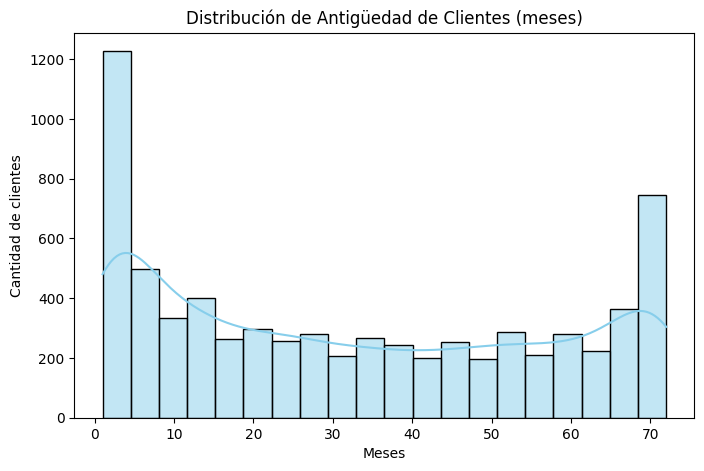

In [168]:
plt.figure(figsize=(8,5))
sns.histplot(df['antigüedad_meses'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Antigüedad de Clientes (meses)')
plt.xlabel('Meses')
plt.ylabel('Cantidad de clientes')
plt.show()

#### Cargos mensulaes y totales

In [169]:
for col in ['cargos_mensuales', 'cargos_totales']:
    stats = df[col].describe()
    mediana = df[col].median()
    print(f"\n=== Estadísticas de {col} ===")
    print(stats)
    print(f"Mediana: {mediana}")




=== Estadísticas de cargos_mensuales ===
count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: cargos_mensuales, dtype: float64
Mediana: 70.35

=== Estadísticas de cargos_totales ===
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: cargos_totales, dtype: float64
Mediana: 1397.475


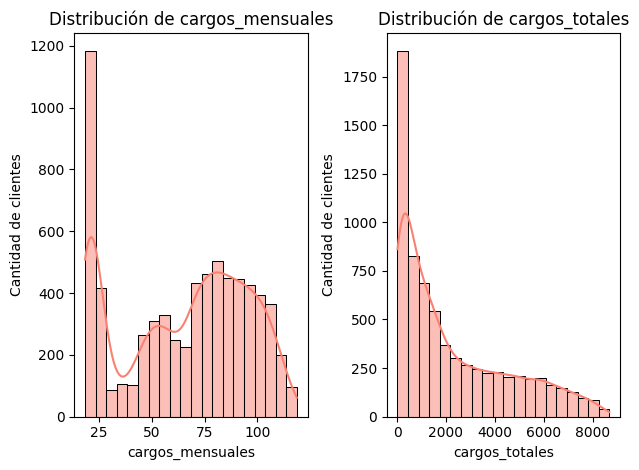

In [170]:
for i, col in enumerate(['cargos_mensuales', 'cargos_totales'], 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[col], bins=20, kde=True, color='salmon')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad de clientes')

plt.tight_layout()
plt.show()

#### Cuentas diarias

In [171]:
stats = df['Cuentas_Diarias'].describe()
mediana = df['Cuentas_Diarias'].median()

print("=== Estadísticas de Cuentas_Diarias ===")
print(stats)
print(f"Mediana: {mediana}")


=== Estadísticas de Cuentas_Diarias ===
count    7032.000000
mean        2.159940
std         1.002866
min         0.608333
25%         1.186250
50%         2.345000
75%         2.995417
max         3.958333
Name: Cuentas_Diarias, dtype: float64
Mediana: 2.3449999999999998


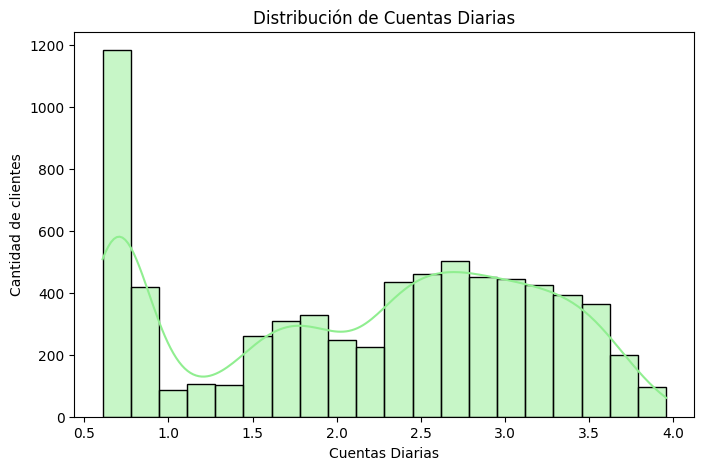

In [172]:
plt.figure(figsize=(8,5))
sns.histplot(df['Cuentas_Diarias'], bins=20, kde=True, color='lightgreen')
plt.title('Distribución de Cuentas Diarias')
plt.xlabel('Cuentas Diarias')
plt.ylabel('Cantidad de clientes')
plt.show()


In [173]:
# Columnas numéricas que analizamos
columnas_numericas = ['antigüedad_meses', 'cargos_mensuales', 'cargos_totales', 'Cuentas_Diarias']

for col in columnas_numericas:
    media = df[col].mean()
    mediana = df[col].median()
    std = df[col].std()
    minimo = df[col].min()
    maximo = df[col].max()

    print(f"\n=== Resumen de {col} ===")
    print(f"Media: {media:.2f}")
    print(f"Mediana: {mediana:.2f}")
    print(f"Desviación estándar: {std:.2f}")
    print(f"Mínimo: {minimo}")
    print(f"Máximo: {maximo}")

    # Observaciones automáticas
    if media > mediana:
        print("Observación: la media es mayor que la mediana → posible sesgo hacia valores altos.")
    elif media < mediana:
        print("Observación: la media es menor que la mediana → posible sesgo hacia valores bajos.")
    else:
        print("Observación: media y mediana son similares → distribución simétrica aproximada.")

    if std > media*0.5:
        print("Observación: alta variabilidad en los datos.")
    else:
        print("Observación: variabilidad moderada en los datos.")


=== Resumen de antigüedad_meses ===
Media: 32.42
Mediana: 29.00
Desviación estándar: 24.55
Mínimo: 1
Máximo: 72
Observación: la media es mayor que la mediana → posible sesgo hacia valores altos.
Observación: alta variabilidad en los datos.

=== Resumen de cargos_mensuales ===
Media: 64.80
Mediana: 70.35
Desviación estándar: 30.09
Mínimo: 18.25
Máximo: 118.75
Observación: la media es menor que la mediana → posible sesgo hacia valores bajos.
Observación: variabilidad moderada en los datos.

=== Resumen de cargos_totales ===
Media: 2283.30
Mediana: 1397.47
Desviación estándar: 2266.77
Mínimo: 18.8
Máximo: 8684.8
Observación: la media es mayor que la mediana → posible sesgo hacia valores altos.
Observación: alta variabilidad en los datos.

=== Resumen de Cuentas_Diarias ===
Media: 2.16
Mediana: 2.34
Desviación estándar: 1.00
Mínimo: 0.6083333333333333
Máximo: 3.9583333333333335
Observación: la media es menor que la mediana → posible sesgo hacia valores bajos.
Observación: variabilidad mod

#### Columnas categorícas

In [174]:
columnas_categoricas = df.select_dtypes(include=['object', 'bool']).columns

for col in columnas_categoricas:
    print(f"\n=== Columna: {col} ===")

    # Frecuencia absoluta
    print("\nFrecuencia absoluta:")
    print(df[col].value_counts())

    # Frecuencia relativa
    print("\nFrecuencia relativa (%):")
    print(df[col].value_counts(normalize=True) * 100)



=== Columna: ID_cliente ===

Frecuencia absoluta:
ID_cliente
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
             ..
0018-NYROU    1
0017-IUDMW    1
0017-DINOC    1
0016-QLJIS    1
0015-UOCOJ    1
Name: count, Length: 7032, dtype: int64

Frecuencia relativa (%):
ID_cliente
9995-HOTOH    0.014221
0002-ORFBO    0.014221
0003-MKNFE    0.014221
0004-TLHLJ    0.014221
0011-IGKFF    0.014221
                ...   
0018-NYROU    0.014221
0017-IUDMW    0.014221
0017-DINOC    0.014221
0016-QLJIS    0.014221
0015-UOCOJ    0.014221
Name: proportion, Length: 7032, dtype: float64

=== Columna: género ===

Frecuencia absoluta:
género
hombre    3549
mujer     3483
Name: count, dtype: int64

Frecuencia relativa (%):
género
hombre    50.469283
mujer     49.530717
Name: proportion, dtype: float64

=== Columna: servicio_internet ===

Frecuencia absoluta:
servicio_internet
fibra óptica    3096
dsl             2416
sin servicio    1520
Name: count, dtype: int64

Fre

/tmp/ipython-input-3157250395.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


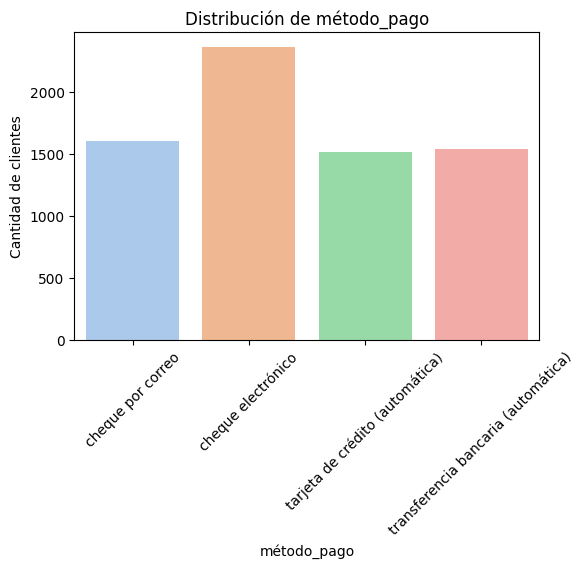

In [175]:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad de clientes')
    plt.xticks(rotation=45)
    plt.show()

### Distribución de evasión

In [176]:
print("=== Frecuencia absoluta de Churn ===")
print(df['Churn'].value_counts(dropna=False))

=== Frecuencia absoluta de Churn ===
Churn
0    5163
1    1869
Name: count, dtype: int64


In [177]:
print("=== Frecuencia relativa de Churn (%) ===")
print(df['Churn'].value_counts(normalize=True) * 100)

=== Frecuencia relativa de Churn (%) ===
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


/tmp/ipython-input-2843777470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='pastel')


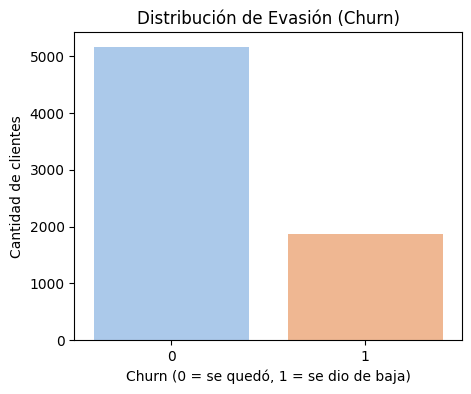

In [178]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Churn', palette='pastel')
plt.title('Distribución de Evasión (Churn)')
plt.xlabel('Churn (0 = se quedó, 1 = se dio de baja)')
plt.ylabel('Cantidad de clientes')
plt.show()

### Recuento de evasión por variables categóricas

In [179]:
# Columnas categóricas a analizar (excluyendo Churn)
columnas_categoricas = df.select_dtypes(include=['object', 'bool']).columns.drop('Churn', errors='ignore')

for col in columnas_categoricas:
    print(f"\n=== Recuento de Churn por {col} ===")

    # Tabla cruzada: conteo absoluto
    crosstab = pd.crosstab(df[col], df['Churn'])
    print("\nConteo absoluto:")
    print(crosstab)

    # Tabla cruzada: porcentaje de churn
    crosstab_perc = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
    print("\nPorcentaje de churn por categoría (%):")
    print(crosstab_perc)




=== Recuento de Churn por ID_cliente ===

Conteo absoluto:
Churn       0  1
ID_cliente      
0002-ORFBO  1  0
0003-MKNFE  1  0
0004-TLHLJ  0  1
0011-IGKFF  0  1
0013-EXCHZ  0  1
...        .. ..
9987-LUTYD  1  0
9992-RRAMN  0  1
9992-UJOEL  1  0
9993-LHIEB  1  0
9995-HOTOH  1  0

[7032 rows x 2 columns]

Porcentaje de churn por categoría (%):
Churn           0      1
ID_cliente              
0002-ORFBO  100.0    0.0
0003-MKNFE  100.0    0.0
0004-TLHLJ    0.0  100.0
0011-IGKFF    0.0  100.0
0013-EXCHZ    0.0  100.0
...           ...    ...
9987-LUTYD  100.0    0.0
9992-RRAMN    0.0  100.0
9992-UJOEL  100.0    0.0
9993-LHIEB  100.0    0.0
9995-HOTOH  100.0    0.0

[7032 rows x 2 columns]

=== Recuento de Churn por género ===

Conteo absoluto:
Churn      0    1
género           
hombre  2619  930
mujer   2544  939

Porcentaje de churn por categoría (%):
Churn           0          1
género                      
hombre  73.795435  26.204565
mujer   73.040482  26.959518

=== Recuento de Chu

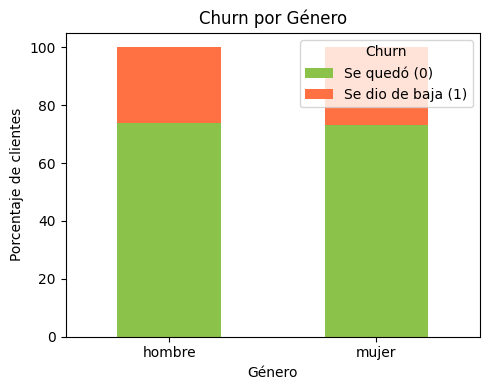

In [180]:
# Tabla cruzada en porcentaje por género
crosstab_gen = pd.crosstab(df['género'], df['Churn'], normalize='index') * 100

# Gráfico de barras apiladas
crosstab_gen.plot(
    kind='bar',
    stacked=True,
    figsize=(5, 4),
    color=['#8BC34A', '#FF7043']  # verde para 0, rojo coral para 1
)

plt.title('Churn por Género')
plt.xlabel('Género')
plt.ylabel('Porcentaje de clientes')
plt.legend(title='Churn', labels=['Se quedó (0)', 'Se dio de baja (1)'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

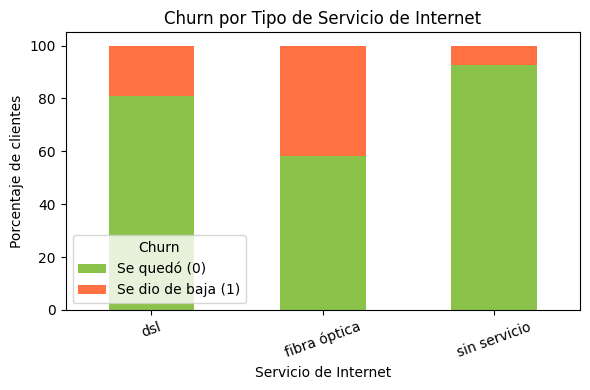

In [181]:
# Tabla cruzada en porcentaje por servicio de internet
crosstab_servicio = pd.crosstab(df['servicio_internet'], df['Churn'], normalize='index') * 100

# Gráfico de barras apiladas
crosstab_servicio.plot(
    kind='bar',
    stacked=True,
    figsize=(6, 4),
    color=['#8BC34A', '#FF7043']  # verde para 0, rojo coral para 1
)

plt.title('Churn por Tipo de Servicio de Internet')
plt.xlabel('Servicio de Internet')
plt.ylabel('Porcentaje de clientes')
plt.legend(title='Churn', labels=['Se quedó (0)', 'Se dio de baja (1)'])
plt.xticks(rotation=20)  # ligera rotación para que no se corten etiquetas
plt.tight_layout()
plt.show()

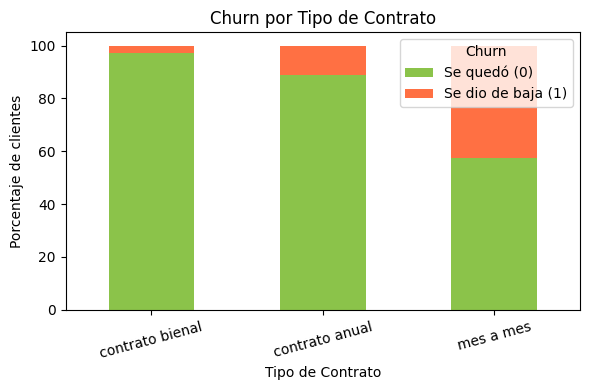

In [182]:
# Tabla cruzada en porcentaje por contrato
crosstab_contrato = pd.crosstab(df['contrato'], df['Churn'], normalize='index') * 100

# Reordenar por porcentaje de Churn=1 (de menor a mayor)
crosstab_contrato = crosstab_contrato.sort_values(by=1, ascending=True)

# Gráfico de barras apiladas
crosstab_contrato.plot(
    kind='bar',
    stacked=True,
    figsize=(6, 4),
    color=['#8BC34A', '#FF7043']  # verde para 0, rojo coral para 1
)

plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Porcentaje de clientes')
plt.legend(title='Churn', labels=['Se quedó (0)', 'Se dio de baja (1)'])
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

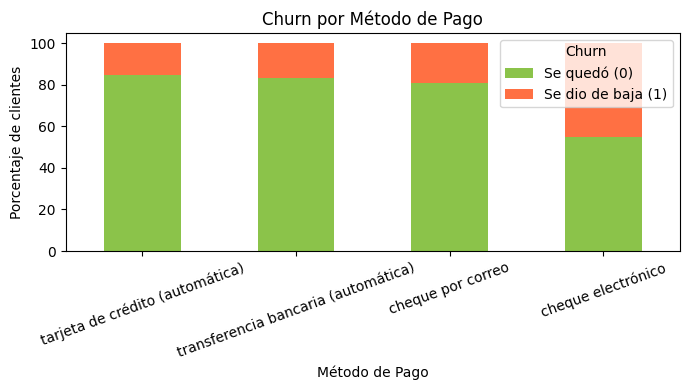

In [183]:
# Tabla cruzada en porcentaje por método de pago
crosstab_pago = pd.crosstab(df['método_pago'], df['Churn'], normalize='index') * 100

# Reordenar por porcentaje de Churn=1 (de menor a mayor)
crosstab_pago = crosstab_pago.sort_values(by=1, ascending=True)

# Gráfico de barras apiladas
crosstab_pago.plot(
    kind='bar',
    stacked=True,
    figsize=(7, 4),
    color=['#8BC34A', '#FF7043']  # verde para 0, rojo coral para 1
)

plt.title('Churn por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Porcentaje de clientes')
plt.legend(title='Churn', labels=['Se quedó (0)', 'Se dio de baja (1)'])
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

#### Conteo de evasión por variables númericas

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns


In [185]:
print("=== antigüedad_meses por Churn ===")
print(df.groupby('Churn')['antigüedad_meses'].describe())



=== antigüedad_meses por Churn ===
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0      5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


/tmp/ipython-input-410230036.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


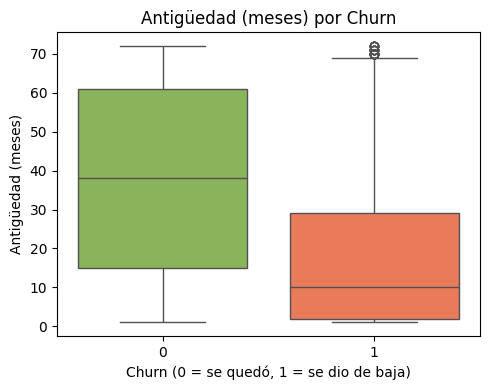

In [186]:
plt.figure(figsize=(5, 4))
sns.boxplot(
    data=df,
    x='Churn',
    y='antigüedad_meses',
    order=[0, 1],
    palette=['#8BC34A', '#FF7043']  # 0=verde (se quedó), 1=rojo (se dio de baja)
)
plt.title('Antigüedad (meses) por Churn')
plt.xlabel('Churn (0 = se quedó, 1 = se dio de baja)')
plt.ylabel('Antigüedad (meses)')
plt.tight_layout()
plt.show()


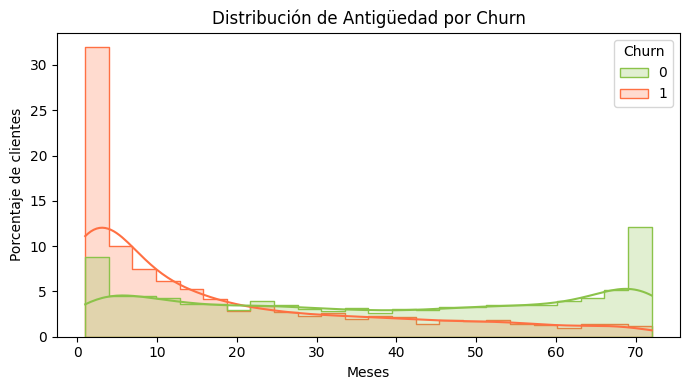

In [187]:
plt.figure(figsize=(7, 4))
sns.histplot(
    data=df,
    x='antigüedad_meses',
    hue='Churn',
    hue_order=[0, 1],
    bins=24,
    stat='percent',
    common_norm=False,
    kde=True,
    element='step',
    palette=['#8BC34A', '#FF7043']
)
plt.title('Distribución de Antigüedad por Churn')
plt.xlabel('Meses')
plt.ylabel('Porcentaje de clientes')
plt.tight_layout()
plt.show()

In [188]:
print("=== cargos_mensuales por Churn ===")
print(df.groupby('Churn')['cargos_mensuales'].describe())



=== cargos_mensuales por Churn ===
        count       mean        std    min    25%    50%     75%     max
Churn                                                                   
0      5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475  118.75
1      1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200  118.35


/tmp/ipython-input-2599316094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


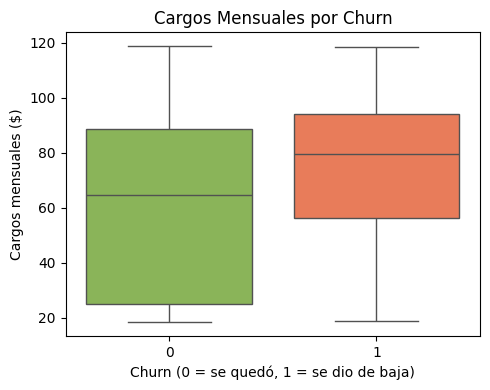

In [189]:
plt.figure(figsize=(5, 4))
sns.boxplot(
    data=df,
    x='Churn',
    y='cargos_mensuales',
    order=[0, 1],
    palette=['#8BC34A', '#FF7043']
)
plt.title('Cargos Mensuales por Churn')
plt.xlabel('Churn (0 = se quedó, 1 = se dio de baja)')
plt.ylabel('Cargos mensuales ($)')
plt.tight_layout()
plt.show()


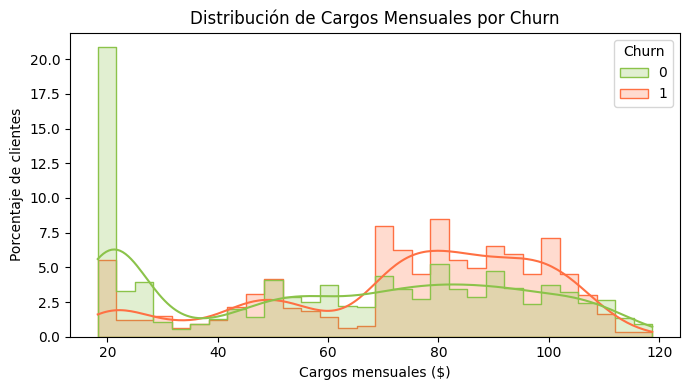

In [190]:
plt.figure(figsize=(7, 4))
sns.histplot(
    data=df,
    x='cargos_mensuales',
    hue='Churn',
    hue_order=[0, 1],
    bins=30,
    stat='percent',
    common_norm=False,
    kde=True,
    element='step',
    palette=['#8BC34A', '#FF7043']
)
plt.title('Distribución de Cargos Mensuales por Churn')
plt.xlabel('Cargos mensuales ($)')
plt.ylabel('Porcentaje de clientes')
plt.tight_layout()
plt.show()

In [191]:
print("=== cargos_totales por Churn ===")
print(df.groupby('Churn')['cargos_totales'].describe())


=== cargos_totales por Churn ===
        count         mean          std    min      25%      50%       75%  \
Churn                                                                        
0      5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
1      1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

           max  
Churn           
0      8672.45  
1      8684.80  


/tmp/ipython-input-2683365450.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


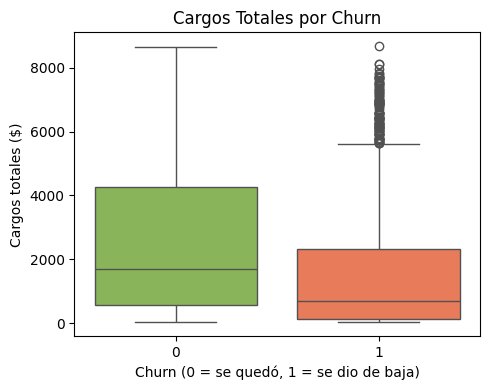

In [192]:
plt.figure(figsize=(5, 4))
sns.boxplot(
    data=df,
    x='Churn',
    y='cargos_totales',
    order=[0, 1],
    palette=['#8BC34A', '#FF7043']
)
plt.title('Cargos Totales por Churn')
plt.xlabel('Churn (0 = se quedó, 1 = se dio de baja)')
plt.ylabel('Cargos totales ($)')
plt.tight_layout()
plt.show()


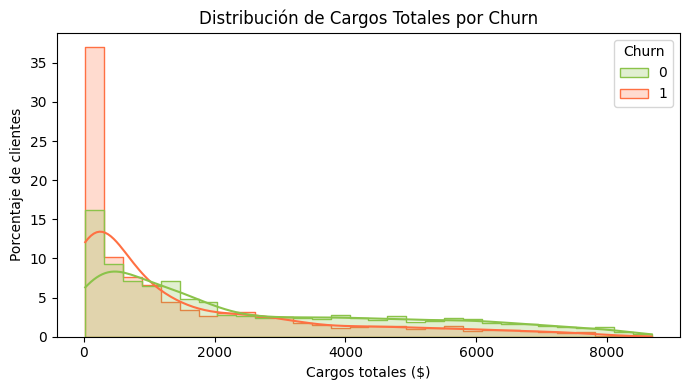

In [193]:
plt.figure(figsize=(7, 4))
sns.histplot(
    data=df,
    x='cargos_totales',
    hue='Churn',
    hue_order=[0, 1],
    bins=30,
    stat='percent',
    common_norm=False,
    kde=True,
    element='step',
    palette=['#8BC34A', '#FF7043']
)
plt.title('Distribución de Cargos Totales por Churn')
plt.xlabel('Cargos totales ($)')
plt.ylabel('Porcentaje de clientes')
plt.tight_layout()
plt.show()

In [194]:
print("=== Cuentas_Diarias por Churn ===")
print(df.groupby('Churn')['Cuentas_Diarias'].describe())



=== Cuentas_Diarias por Churn ===
        count      mean       std       min       25%       50%       75%  \
Churn                                                                       
0      5163.0  2.043580  1.036485  0.608333  0.836667  2.148333  2.949167   
1      1869.0  2.481378  0.822202  0.628333  1.871667  2.655000  3.140000   

            max  
Churn            
0      3.958333  
1      3.945000  


/tmp/ipython-input-2990503831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


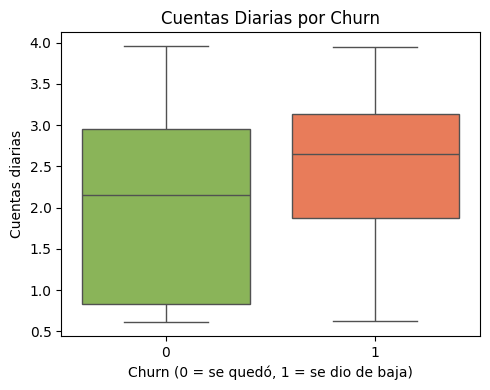

In [195]:
plt.figure(figsize=(5, 4))
sns.boxplot(
    data=df,
    x='Churn',
    y='Cuentas_Diarias',
    order=[0, 1],
    palette=['#8BC34A', '#FF7043']
)
plt.title('Cuentas Diarias por Churn')
plt.xlabel('Churn (0 = se quedó, 1 = se dio de baja)')
plt.ylabel('Cuentas diarias')
plt.tight_layout()
plt.show()


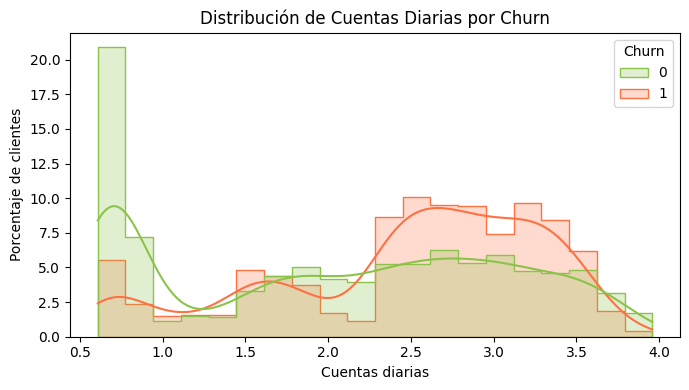

In [196]:
plt.figure(figsize=(7, 4))
sns.histplot(
    data=df,
    x='Cuentas_Diarias',
    hue='Churn',
    hue_order=[0, 1],
    bins=20,
    stat='percent',
    common_norm=False,
    kde=True,
    element='step',
    palette=['#8BC34A', '#FF7043']
)
plt.title('Distribución de Cuentas Diarias por Churn')
plt.xlabel('Cuentas diarias')
plt.ylabel('Porcentaje de clientes')
plt.tight_layout()
plt.show()

INFORME FINAL



1. Introducción

El presente informe tiene como objetivo analizar el comportamiento de los clientes de la compañía, con un enfoque especial en la evasión (Churn).
Se realizaron análisis descriptivos de variables numéricas y categóricas, así como evaluaciones específicas para entender qué factores podrían estar asociados con la cancelación del servicio.

El lenguaje técnico se acompaña de explicaciones simples para que cualquier lector, incluso sin experiencia en ciencia de datos, pueda interpretar las conclusiones.


---

2. Análisis Descriptivo General

2.1 Variables Numéricas (visión global)

Se calcularon métricas como media, mediana, desviación estándar, valores mínimos y máximos para cuatro variables clave:

Variable	Media	Mediana	Desviación Estándar	Min	Max	Observaciones

Antigüedad (meses)	32.42	29.00	24.55	1	72	Media > mediana → sesgo hacia valores altos; alta variabilidad
Cargos mensuales	64.80	70.35	30.09	18.25	118.75	Media < mediana → sesgo hacia valores bajos; variabilidad moderada
Cargos totales	2283.30	1397.47	2266.77	18.8	8684.8	Media > mediana → sesgo hacia valores altos; alta variabilidad
Cuentas Diarias	2.16	2.34	1.00	0.61	3.96	Media < mediana → sesgo hacia valores bajos; variabilidad moderada


📌Los datos muestran que hay clientes con muy poca y mucha antigüedad, así como altas diferencias en el gasto total, lo que indica grupos de clientes muy distintos entre sí.


---

2.2 Variables Categóricas (visión global)

Género: Distribución equilibrada (Hombres: 50.47%, Mujeres: 49.53%).

Servicio de Internet: Fibra óptica (44.03%), DSL (34.36%), sin servicio (21.62%).

Tipo de contrato: Predomina mes a mes (55.11%), seguido de contrato bienal (23.96%) y anual (20.93%).

Método de pago: Mayor uso de cheque electrónico (33.63%), seguido por otros métodos en proporciones similares (~22%).


📌El cliente típico puede ser de cualquier género, pero hay preferencia por contratos mes a mes y fibra óptica como tipo de conexión.


---

3. Análisis de Evasión (Churn)

3.1 Distribución General

Clientes que permanecen: 73.42%

Clientes que cancelaron: 26.58%


📌 Esto indica que 1 de cada 4 clientes ha cancelado el servicio.


---

3.2 Evasión por Variables Categóricas

Género: No hay diferencias significativas en evasión entre hombres y mujeres.

Servicio de Internet: Clientes con fibra óptica presentan una tasa de evasión más alta que DSL o quienes no tienen servicio.

Tipo de contrato: Los clientes con contrato mes a mes tienen una tasa de evasión considerablemente mayor, mientras que contratos anuales o bienales retienen más clientes.

Método de pago: El uso de cheque electrónico está asociado con mayor evasión en comparación con métodos automáticos.



---

3.3 Evasión por Variables Numéricas

Cargos Mensuales

Churn = 1 (cancelaron): Media de 74.44

Churn = 0 (permanecen): Media de 61.31
📌 Clientes que pagan más al mes tienden a cancelar con más frecuencia.


Cargos Totales

Churn = 1: Media de 1531.79

Churn = 0: Media de 2555.34
📌 Los clientes que permanecen tienen un gasto total acumulado más alto, posiblemente porque han estado más tiempo en la compañía.


Cuentas Diarias

Churn = 1: Media de 2.48

Churn = 0: Media de 2.04
📌 Un mayor número de cuentas diarias parece correlacionarse con una mayor evasión, pero la diferencia no es tan marcada como en cargos mensuales.



---

CONCLUSION

1. Factor Contrato: El tipo de contrato es uno de los principales predictores de evasión. Contratos mes a mes tienen mayor rotación.


2. Costo Mensual: Clientes con cargos mensuales altos tienden a irse más rápido.


3. Servicio de Internet: Fibra óptica muestra más evasión que DSL, lo que podría indicar problemas de satisfacción o precio.


4. Método de pago: Pagos manuales, especialmente por cheque electrónico, se asocian con mayor cancelación.


5. Perfil del Cliente con Mayor Riesgo: Contrato mes a mes + fibra óptica + pago por cheque electrónico + cargos mensuales altos.




---

5. Recomendaciones Estratégicas

Fidelizar clientes con contratos mes a mes: ofrecer descuentos o beneficios para migrar a contratos más largos.

Revisar precios y paquetes de fibra óptica para reducir evasión en ese segmento.

Incentivar pagos automáticos con beneficios, reduciendo la fricción de pago.

Analizar casos de altos cargos mensuales para ajustar precios o personalizar ofertas.



---

📊 En resumen:
Este análisis muestra claramente que la evasión no es aleatoria, sino que está influenciada por factores específicos. Comprenderlos permite diseñar estrategias focalizadas para reducir la pérdida de clientes y aumentar la retención.


---

